<a href="https://colab.research.google.com/github/giov27/OpticalConductivityGraphene/blob/main/Generate_OpticalConductivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import csv
# scipy.__version__
# from numba import guvectorize, complex64
# from scipy import constants

# print(constants.Boltzmann)
# For local runtime
# jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' --port=8888 --NotebookApp.port_retries=0 --no-browser
# pd.set_option("max_rows", None)
# pd.set_option("max_colwidth", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# constanta

na = 64 # Number of atom in both direction
nm = na-1
nx = na # Number of atom in x-direction
ny = na # Number of atom in y-direction
nl = na//2 # Number of repetation for 2x2 block matrix
lx = 1 # Length of wavefunction in x-direction
ly = 1 # Length of wavefunction in y-direction
dx = lx/nx # Interval x
dy = ly/ny # Interval y

nrx = nx//2
nry = ny//2

pot = 0 # On-site potensial 

nt = 4096 # timestep
nta = nt//2 # Rounded half of timestep
deltaT = 0.02 # interval time
ta = (nt/2)*deltaT # Maximum value of Time Propagation
Tm = ta*(np.pi/(2*np.pi))
dTm = Tm/nta

a = 1 # hopping parameter
mu = 0 # Chemical Potential

T = 300 # temperature
# Kb = 0.03564 #1 # boltzmann constant
Kb = 0.695 #1 # boltzmann constant
# T_au = T /(3.158*10**(5))
beta = 1 / (Kb * T)

sum0 = 0

print(beta)

0.004796163069544365


In [ ]:
# Array Declaration
# H_even = np.zeros((nx,ny), dtype=float)
# H_odd = np.zeros((nx,ny), dtype=float)
# fermiDirac = np.zeros((nx,ny), dtype=complex)
# fermiDirac_t1 = np.zeros((nx,ny), dtype=complex)
# fermiDirac_t2 = np.zeros((nx,ny), dtype=complex)

In [ ]:
def omega():
  # Tm = ta*(1/(2*np.pi)) #new periode is shifted by factor 0.159(or 1/(2*pi)) hence the freq window following Nyquist Theorm
  # dTm = (Tm/nta) #delta Tau maks
  print('Tau Maks: {}, Delta Tau: {}'.format(Tm, dTm))
  tau = 0
  tau_arr = np.linspace(0,Tm,nta)
  # tau_arr = []
  # for k in range(nt):
  #   if (tau <= Tm):
  #     tau_arr.append(tau)
  #     tau = tau + dTm

  #Constanta Opcon
  Wm = 1/(2*dTm) # Maximum frequency, with Nyquist Theorem applied
  dWm = 1/(2*Tm) # Frequency interval, with Nyquist Theorem applied
  print('W Maks: {}, Delta W: {}'.format(Wm, dWm))
  W = 0.001
  W_arr = np.linspace(0, Wm, nta)
  # W_arr2 = []
  # for k in range(nt):
  #   if (W <= Wm):
  #     W_arr2.append(W)
  #     W = W + dWm
    
  return tau_arr, W_arr,Tm, Wm

In [ ]:
# import csv

# with open('employee_file.csv', mode='w') as employee_file:
#     employee_writer = csv.writer(employee_file, delimiter=',')
#     for i in range(10):
#       employee_writer.writerow([i])

In [ ]:
# !cat '/content/drive/MyDrive/Data/opCon512_0.695.csv'

In [ ]:
opCon32 = np.loadtxt('/content/drive/MyDrive/Data/Data3/opCon32_0.695.csv', delimiter=',' , dtype=complex)
opCon64 = np.loadtxt('/content/drive/MyDrive/Data/Data3/opCon64_0.695.csv', delimiter=',' , dtype=complex)
opCon128 = np.loadtxt('/content/drive/MyDrive/Data/Data3/opCon128_0.695.csv', delimiter=',' , dtype=complex)
opCon256 = np.loadtxt('/content/drive/MyDrive/Data/Data3/opCon256_0.695.csv', delimiter=',' , dtype=complex)
opCon512 = np.loadtxt('/content/drive/MyDrive/Data/Data3/opCon512_0.695.csv', delimiter=',' , dtype=complex)
print(opCon512.shape)

(2048,)


In [ ]:
print(opCon512)

[-1.45555691-0.0014506j  -1.45216074-0.00111291j -1.44167759-0.00077946j
 ... -0.01013647-0.00157689j -0.01081542-0.00144188j
 -0.01142427-0.00131002j]


In [ ]:
# def input_tau(func):
#   tau = 0
#   for k in range(nt):
#     if tau < ta:
#       func[k] = 2*np.exp(-1*0.18*tau)*func[k]
#       tau = dTm*(k+2)
#   return func

In [ ]:
# opCon128_tau = input_tau(opCon128)
# X = np.zeros(len(opCon32))
# fungsiKorelasi128_tau = np.hstack((X,opCon128_tau))

In [ ]:
# opCon32_kb = np.loadtxt('/content/drive/MyDrive/Data/opCon32_0.03564.csv', delimiter=',' , dtype=complex)
# opCon64_kb = np.loadtxt('/content/drive/MyDrive/Data/opCon64_0.03564.csv', delimiter=',' , dtype=complex)
# opCon128_kb = np.loadtxt('/content/drive/MyDrive/Data/opCon128_0.03564.csv', delimiter=',' , dtype=complex)
# opCon256_kb = np.loadtxt('/content/drive/MyDrive/Data/opCon256_0.03564.csv', delimiter=',' , dtype=complex)
# opCon512_kb = np.loadtxt('/content/drive/MyDrive/Data/opCon512_0.03564.csv', delimiter=',' , dtype=complex)

In [ ]:
tau_arr, W_arr, tau_max, W_max = omega()
print(W_arr)
tau_arr1 = np.linspace(-tau_max, tau_max, nt)
print(tau_arr1)

Tau Maks: 20.48, Delta Tau: 0.01
W Maks: 50.0, Delta W: 0.0244140625
[0.00000000e+00 2.44259893e-02 4.88519785e-02 ... 4.99511480e+01
 4.99755740e+01 5.00000000e+01]
[-20.48       -20.46999756 -20.45999512 ...  20.45999512  20.46999756
  20.48      ]


In [ ]:
X = np.zeros(len(opCon32))
Y = np.zeros(len(opCon512))
fungsiKorelasi32 = np.hstack((X,opCon32))
fungsiKorelasi64 = np.hstack((X,opCon64))
fungsiKorelasi128 = np.hstack((X,opCon128))
fungsiKorelasi256 = np.hstack((X,opCon256))
fungsiKorelasi512 = np.hstack((X,opCon512))
# fungsiKorelasi512 = np.hstack((fungsiKorelasi512_1,Y))
# fungsiKorelasi32 = np.hstack((X,opCon32[0:nt]))
# fungsiKorelasi64 = np.hstack((X,opCon64[0:nt]))
# fungsiKorelasi128 = np.hstack((X,opCon128[0:nt]))
# fungsiKorelasi256 = np.hstack((X,opCon256[0:nt]))

In [ ]:
pd.DataFrame(fungsiKorelasi512)

,0
0,0.000000+0.000000j
1,0.000000+0.000000j
2,0.000000+0.000000j
3,0.000000+0.000000j
4,0.000000+0.000000j
...,...
4091,-0.008605-0.001852j
4092,-0.009396-0.001714j
4093,-0.010136-0.001577j
4094,-0.010815-0.001442j


In [ ]:
# fungsiKorelasi32_kb = np.hstack((X,opCon32[0:nt]))
# fungsiKorelasi64_kb = np.hstack((X,opCon64[0:nt]))
# fungsiKorelasi128_kb = np.hstack((X,opCon128[0:nt]))
# fungsiKorelasi256_kb = np.hstack((X,opCon256[0:nt]))
# fungsiKorelasi512_kb = np.hstack((X,opCon512))

In [ ]:
# x = [elem.real for elem in data]
# y = [elem.imag for elem in data]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


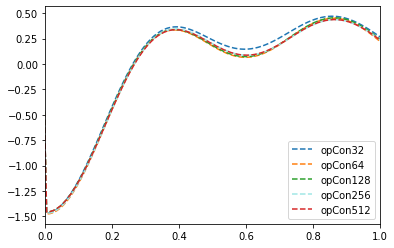

In [ ]:
# plt.plot(np.arange(0, nt), fungsiKorelasi32[0:nt].imag, label='opCon32', linestyle='dashed' )
plt.plot(tau_arr1, fungsiKorelasi32, label='opCon32', linestyle='dashed' )
plt.plot(tau_arr1,fungsiKorelasi64, label='opCon64', linestyle='dashed')
plt.plot(tau_arr1, fungsiKorelasi128, label='opCon128', linestyle='dashed')
plt.plot(tau_arr1, fungsiKorelasi256, label='opCon256', linestyle='dashed', color='#A0E7E5')
plt.plot(tau_arr1, fungsiKorelasi512, label='opCon512', linestyle='dashed')
plt.xlim(0, 1)
plt.legend()
plt.show()

In [ ]:
plt.plot(np.arange(len(fungsiKorelasi512)), fungsiKorelasi512.imag, label='opCon512', linestyle='dashed')

In [ ]:
# plt.plot(np.arange(0, nt), opCon512[0:2048].imag, label='opCon512', linestyle='dashed')
# tau_arr2 = np.linspace(-tau_max, tau_max, nt)
# plt.plot(tau_arr1, fungsiKorelasi512.imag, label='opCon512', linestyle='dashed')
# plt.xlim(0, 5)
# plt.legend()
# plt.show()

In [ ]:
# plt.plot(np.arange(0, nt), fungsiKorelasi32[0:nt].imag, label='opCon32', linestyle='dashed' )
# plt.plot(tau_arr1, fungsiKorelasi32_kb.imag, label='opCon32', linestyle='dashed' )
# plt.plot(tau_arr1,fungsiKorelasi64_kb.imag, label='opCon64', linestyle='dashed')
# plt.plot(tau_arr1, fungsiKorelasi128_kb.imag, label='opCon128', linestyle='dashed')
# plt.plot(tau_arr1, fungsiKorelasi256_kb.imag, label='opCon256', linestyle='dashed')
# plt.plot(tau_arr1, opCon512, label='opCon512', linestyle='dashed')
# plt.xlim(0, 5)
# plt.legend()
# plt.show()

In [ ]:
# plt.plot(np.arange(0, nt), opCon512[0:2048].imag, label='opCon512', linestyle='dashed')
# tau_arr2 = np.linspace(-tau_max, tau_max, nt)
# plt.plot(tau_arr1, fungsiKorelasi512_kb.imag, label='opCon512', linestyle='dashed')
# plt.xlim(0, 5)
# plt.legend()
# plt.show()

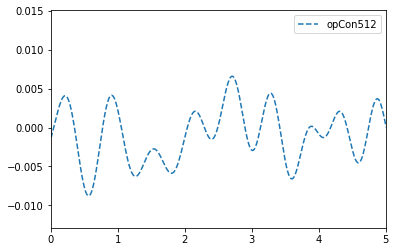

In [ ]:
# plt.plot(tau_arr1, fungsiKorelasi256_kb.imag,'*' ,label='opCon512_kb')
plt.plot(tau_arr1, fungsiKorelasi256.imag, label='opCon512', linestyle='dashed')
plt.xlim(0, 5)
# plt.ylim(-20,20)
plt.legend()
plt.show()

In [ ]:
##Opcon FFT 

def opConFFT(func):
  g = np.hanning(len(func))
  # wp = np.abs(func*g)
  wp = func*g

  y = scipy.fft.fft(wp)/(2*np.pi)
  # y1 = y
  result = scipy.fft.fftshift(y)

  # freq = scipy.fft.fftfreq(len(func), 2.95*deltaT)
  freq = scipy.fft.fftfreq(len(func), 6*dTm)
  # print(freq)
  # freq1 = scipy.fft.fftshift(freq*((2*np.pi)/3.05))
  freq1 = scipy.fft.fftshift(freq*((2*np.pi)))

  return freq1, result

def opConFFT_1(func):
  g = np.hanning(len(func))
  # wp = np.abs(func*g)
  wp = func*g

  y = scipy.fft.fft(wp)/(2*np.pi)
  # y1 = y
  result = scipy.fft.fftshift(y)

  freq = scipy.fft.fftfreq(len(func), 5.95*deltaT)
  # print(freq)
  # freq1 = scipy.fft.fftshift(freq*((2*np.pi)/3.05))
  freq1 = scipy.fft.fftshift(freq*((2*np.pi)))

  return freq1, result

def opConFFT_imag(func):
  g = np.hanning(len(func))
  # wp = np.abs(func*g)
  wp = func*g

  y = scipy.fft.rfft(wp)/(2*np.pi)
  result = y
  # result = scipy.fft.fftshift(y1)

  freq1 = scipy.fft.rfftfreq(len(func), 3*deltaT)
  # print(freq)
  # freq1 = scipy.fft.fftshift(freq*((2*np.pi)/3.05))
  # freq1 = scipy.fft.fftshift(freq*((2*np.pi)))

  return freq1, result

Count Optical Conductivity with function correalation real and imaginary

In [ ]:
opConFFT_t32 = opConFFT(fungsiKorelasi32)
opConFFT_t64 = opConFFT(fungsiKorelasi64)
opConFFT_t128 = opConFFT(fungsiKorelasi128)
opConFFT_t256 = opConFFT(fungsiKorelasi256)
opConFFT_t512 = opConFFT(fungsiKorelasi512)

In [ ]:
# opConFFT_t128_tau = opConFFT(fungsiKorelasi128_tau)

In [ ]:
# plt.plot(opConFFT_t128_tau[0],  np.absolute(opConFFT_t128_tau[1]), label='opCon128_tau')

# plt.xlim(-25,25)
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
# opConFFT_t32_kb = opConFFT(fungsiKorelasi32_kb)
# opConFFT_t64_kb = opConFFT(fungsiKorelasi64_kb)
# opConFFT_t128_kb = opConFFT(fungsiKorelasi128_kb)
# opConFFT_t256_kb = opConFFT(fungsiKorelasi256_kb)
# opConFFT_t512_kb = opConFFT(fungsiKorelasi512_kb)

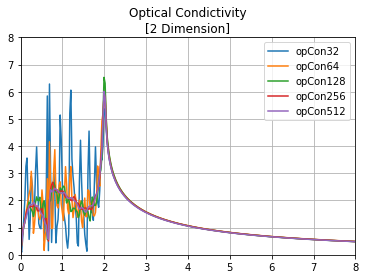

In [ ]:
plt.title('Optical Condictivity\n[2 Dimension]')
plt.plot(opConFFT_t32[0], np.absolute(opConFFT_t32[1].imag),  label='opCon32')
plt.plot(opConFFT_t64[0], np.absolute(opConFFT_t64[1].imag),  label='opCon64')
plt.plot(opConFFT_t128[0],  np.absolute(opConFFT_t128[1].imag),  label='opCon128')
plt.plot(opConFFT_t256[0],  np.absolute(opConFFT_t256[1].imag), label='opCon256')
plt.plot(opConFFT_t512[0],  np.absolute(opConFFT_t512[1].imag), label='opCon512')

plt.xlim(0,8)
plt.ylim(0,8)
plt.legend()
plt.grid()
plt.show()

In [ ]:
def constApply(func):
  xMid = len(func[0])//2
  xLast = len(func[0])
  Wm = 1/(2*dTm) # Maximum frequency, with Nyquist Theorem applied
  dWm = 1/(2*ta)
  opCon_x = func[0][xMid:xLast]
  print(len(opCon_x))
  omega = np.linspace(0,6,xMid)
  opCon_valueSlice = func[1][xMid:xLast]
  # const = -beta*omega
  # const2 = (np.exp(const)-1)/omega
  # print(const2)
  # print(const)
  opCon_Const = []
  opCon = []
  for k in opCon_x:
    if k == 0 :
      opCon_Const.append(0)
    else :
      const1 = -beta*k
      opCon_Const.append(-(np.exp(const1)-1)/k)
  # for k in range(xMid, xLast,1):
  #     print(k)
  #     tau = dTm*(k+2)
  #   if k == 0 :
  #     opCon_Const.append(0)
  #   else :
  #     const1 = -beta*k
  #     # print(np.exp(const1))
  #     opCon_Const.append((np.exp(const1)-1)/k)
  const = np.array(opCon_Const)
  for k in range(xMid):
    # opCon.append(((const[k] * func[1][k].imag)/1))
    # opCon.append(((const[k]*200 * opCon_valueSlice[k])/1))
    opCon.append(((const[k]* 140*opCon_valueSlice[k].imag)/1))
    # opCon.append(((opCon_Const[k] * func[1][k])/0.04).real)
  # opCon_t6 = np.fft.fftshift(opCon)
  print(opCon_Const)
  return opCon_x, opCon

In [ ]:
opCon32_t2 = constApply(opConFFT_t32)
opCon64_t2 = constApply(opConFFT_t64)
opCon128_t2 = constApply(opConFFT_t128)
opCon256_t2 = constApply(opConFFT_t256)
opCon512_t2 = constApply(opConFFT_t512)

2048
[0, 0.004795869027926796, 0.004795575010343884, 0.004795281016793909, 0.004794987047275788, 0.004794693101786697, 0.004794399180324971, 0.004794105282887416, 0.004793811409472977, 0.004793517560078656, 0.0047932237347022184, 0.00479292993334185, 0.004792636155995253, 0.004792342402659836, 0.004792048673333748, 0.0047917549680147635, 0.004791461286700669, 0.004791167629389262, 0.0047908739960781065, 0.004790580386765277, 0.004790286801448366, 0.004789993240125427, 0.004789699702793874, 0.004789406189451955, 0.004789112700096941, 0.00478881923472706, 0.004788525793339977, 0.004788232375933545, 0.004787938982505456, 0.00478764561305342, 0.004787352267575311, 0.004787058946069134, 0.004786765648532331, 0.004786472374963049, 0.004786179125358757, 0.004785885899717463, 0.004785592698036914, 0.004785299520314863, 0.004785006366549192, 0.004784713236737547, 0.0047844201308779215, 0.004784127048968081, 0.004783833991005592, 0.004783540956988547, 0.004783247946914621, 0.004782954960781601, 

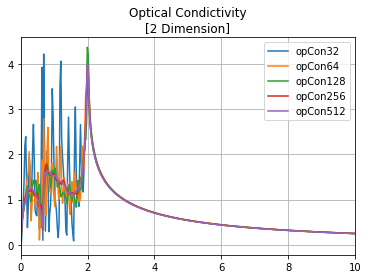

In [ ]:
plt.title('Optical Condictivity\n[2 Dimension]')
plt.plot(opCon32_t2[0],np.abs(opCon32_t2[1]), label='opCon32')
plt.plot(opCon64_t2[0],np.abs(opCon64_t2[1]), label='opCon64')
plt.plot(opCon128_t2[0],np.abs(opCon128_t2[1]), label='opCon128')
plt.plot(opCon256_t2[0],np.abs(opCon256_t2[1]), label='opCon256')
plt.plot(opCon512_t2[0],np.abs(opCon512_t2[1]), label='opCon512')
plt.xlim(0,10)
plt.legend()
plt.grid()

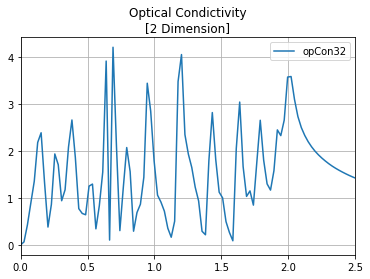

In [ ]:
plt.title('Optical Condictivity\n[2 Dimension]')
plt.plot(opCon32_t2[0],np.abs(opCon32_t2[1]), label='opCon32')

plt.xlim(0,2.5)
plt.legend()
plt.grid()

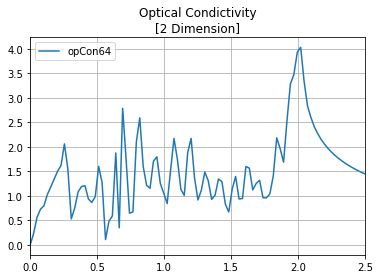

In [ ]:
plt.title('Optical Condictivity\n[2 Dimension]')
plt.plot(opCon64_t2[0],np.abs(opCon64_t2[1]), label='opCon64')
plt.xlim(0,2.5)
plt.legend()
plt.grid()

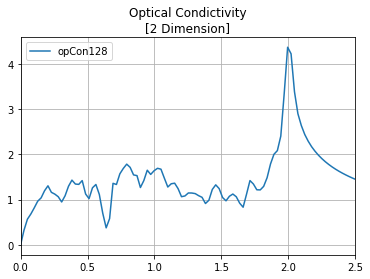

In [ ]:
plt.title('Optical Condictivity\n[2 Dimension]')
plt.plot(opCon128_t2[0],np.abs(opCon128_t2[1]), label='opCon128')
plt.xlim(0,2.5)
plt.legend()
plt.grid()

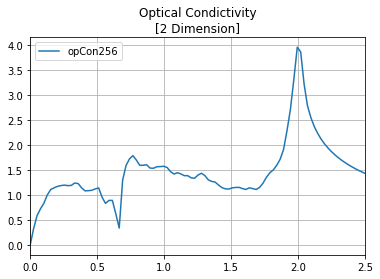

In [ ]:
plt.title('Optical Condictivity\n[2 Dimension]')
plt.plot(opCon256_t2[0],np.abs(opCon256_t2[1]), label='opCon256')
plt.xlim(0,2.5)
plt.legend()
plt.grid()

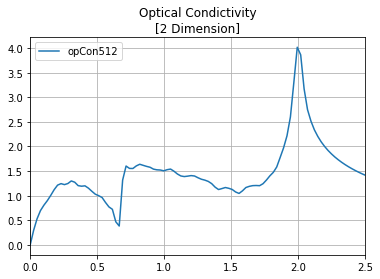

In [ ]:
plt.title('Optical Condictivity\n[2 Dimension]')
plt.plot(opCon512_t2[0],np.abs(opCon512_t2[1]), label='opCon512')
plt.xlim(0,2.5)
plt.legend()
plt.grid()

In [ ]:
# plt.title('Imaginary Part Optical Condictivity\n[2 Dimension]')
# plt.plot(opConFFT_t32[0], opConFFT_t32[1].imag, label='opCon32')
# plt.plot(opConFFT_t64[0], opConFFT_t64[1].imag, label='opCon64')
# plt.plot(opConFFT_t128[0], opConFFT_t128[1].imag, label='opCon128')
# plt.plot(opConFFT_t256[0], np.abs(opConFFT_t256[1].imag), label='opCon256')
# plt.plot(opConFFT_t512[0],np.absolute( opConFFT_t512[1].imag/8500), label='opCon512')

# plt.xlim(0,7)
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
# plt.title('Real Part Optical Condictivity\n[2 Dimension]')
# plt.plot(opConFFT_t32[0],np.absolute(opConFFT_t32[1].real), label='opCon32')
# plt.plot(opConFFT_t64[0],np.absolute (opConFFT_t64[1].real), label='opCon64')
# plt.plot(opConFFT_t128[0], np.absolute(opConFFT_t128[1].real), label='opCon128')
# plt.plot(opConFFT_t256[0], np.absolute(opConFFT_t256[1].real), label='opCon256')
# plt.plot(opConFFT_t512[0], opConFFT_t512[1].real/8500, label='opCon512')

# plt.xlim(0,7)
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
# plt.title('Optical Condictivity\n[2 Dimension]')
# plt.plot(opConFFT_t512[0], opConFFT_t512[1].imag, '--o', label='opCon512')

# plt.xlim(0,7)
# plt.grid()
# plt.show()

In [ ]:
# plt.plot(opConFFT_t32_kb[0], opConFFT_t32_kb[1].imag, '--')
# plt.plot(opConFFT_t64_kb[0], opConFFT_t64_kb[1].imag, '--')
# plt.plot(opConFFT_t128_kb[0], opConFFT_t128_kb[1].imag, '--')
# plt.plot(opConFFT_t256_kb[0], opConFFT_t256_kb[1].imag, '--')
# plt.plot(opConFFT_t512_kb[0], opConFFT_t512_kb[1].imag, '--')
# plt.xlim(0,8)
# plt.grid()
# plt.show()

In [ ]:
# plt.plot(opConFFT_t256[0], opConFFT_t256[1].imag)
# plt.plot(opConFFT_t256_kb[0], opConFFT_t256_kb[1].imag, '--')
# plt.plot(opConFFT_t512_kb[0], opConFFT_t512_kb[1].imag, '--')
# plt.xlim(0,53)
# plt.grid()
# plt.show()

Count Optical Conductivity with function correalation imaginary

In [ ]:
# opConFFT_t32_imag = opConFFT_imag(fungsiKorelasi32.imag)
# opConFFT_t64_imag = opConFFT_imag(fungsiKorelasi64.imag)
# opConFFT_t128_imag = opConFFT_imag(fungsiKorelasi128.imag)
# opConFFT_t256_imag = opConFFT_imag(fungsiKorelasi256.imag)
# opConFFT_t512_imag = opConFFT_imag(fungsiKorelasi512.imag)

In [ ]:
# opConFFT_t32_kb_imag = opConFFT_imag(fungsiKorelasi32_kb.imag)
# opConFFT_t64_kb_imag = opConFFT_imag(fungsiKorelasi64_kb.imag)
# opConFFT_t128_kb_imag = opConFFT_imag(fungsiKorelasi128_kb.imag)
# opConFFT_t256_kb_imag = opConFFT_imag(fungsiKorelasi256_kb.imag)
# opConFFT_t512_kb_imag = opConFFT_imag(fungsiKorelasi512_kb.imag)

Bagian Real

In [ ]:
# plt.plot(opConFFT_t32_imag[0], opConFFT_t32_imag[1], '--')
# plt.plot(opConFFT_t64_imag[0], opConFFT_t64_imag[1], '--')
# plt.plot(opConFFT_t128_imag[0], opConFFT_t128_imag[1], '--')
# plt.plot(opConFFT_t256_imag[0], opConFFT_t256_imag[1], '--')

# plt.xlim(0,1)
# plt.grid()
# plt.show()

In [ ]:
# plt.plot(opConFFT_t512_imag[0], opConFFT_t512_imag[1], '--')
# plt.xlim(0,1)

In [ ]:
# plt.plot(opConFFT_t32_kb_imag[0], opConFFT_t32_kb_imag[1], '--')
# plt.plot(opConFFT_t64_kb_imag[0], opConFFT_t64_kb_imag[1], '--')
# plt.plot(opConFFT_t128_kb_imag[0], opConFFT_t128_kb_imag[1], '--')
# plt.plot(opConFFT_t256_kb_imag[0], opConFFT_t256_kb_imag[1], '--')

# plt.xlim(0,1)
# plt.grid()
# plt.show()

In [ ]:
# plt.plot(opConFFT_t512_kb_imag[0], opConFFT_t512_kb_imag[1], '--')
# plt.xlim(0,1)

Bagian Imaginary

In [ ]:
# opConFFT_t256_imag_abs = opConFFT_imag(np.abs(fungsiKorelasi256.imag))
# opConFFT_t256_imag_abs = opConFFT_imag(fungsiKorelasi256.imag)

# plt.plot(opConFFT_t256_imag_abs[0], np.abs(opConFFT_t256_imag_abs[1]))
# plt.xlim(0,1)
# plt.grid()
# plt.show()

In [ ]:
# plt.plot(opConFFT_t32_kb_imag[0], opConFFT_t32_kb_imag[1].imag, '--', label='opCon32')
# plt.plot(opConFFT_t64_kb_imag[0], opConFFT_t64_kb_imag[1].imag, '--', label='opCon64')
# plt.plot(opConFFT_t128_kb_imag[0], opConFFT_t128_kb_imag[1].imag, '--', label='opCon128')
# plt.plot(opConFFT_t256_kb_imag[0], opConFFT_t256_kb_imag[1].imag, '--', label='opCon256')

# plt.xlim(0,1)
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
# plt.plot(opConFFT_t512_imag[0], np.abs(opConFFT_t256_kb_imag[1].imag), '*', label='opCon512-')
# plt.plot(opConFFT_t512_kb_imag[0], np.abs(opConFFT_t256_kb_imag[1].imag), '--', label='opCon512')

# plt.xlim(0,1)
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
# def constApply(func):
#   xMid = len(func[0])//2
#   xLast = len(func[0])
#   Wm = 1/(2*dTm) # Maximum frequency, with Nyquist Theorem applied
#   dWm = 1/(2*ta)
#   # opCon_x = np.linspace(0,Wm,xMid)
#   opCon_x = func[0][4096:8192]
#   print(len(opCon_x))
#   omega = np.linspace(0,6,xMid)
#   opCon_valueSlice = func[1][xMid:xLast]
#   # const = -beta*omega
#   # const2 = (np.exp(const)-1)/omega
#   # print(const2)
#   # print(const)
#   opCon_Const = []
#   opCon = []
#   for k in opCon_x:
#     if k == 0 :
#       opCon_Const.append(0)
#     else :
#       const1 = -beta*k
#       opCon_Const.append(-(np.exp(const1)-1)/k)
#   # for k in range(xMid, xLast,1):
#   #     print(k)
#   #     tau = dTm*(k+2)
#   #   if k == 0 :
#   #     opCon_Const.append(0)
#   #   else :
#   #     const1 = -beta*k
#   #     # print(np.exp(const1))
#   #     opCon_Const.append((np.exp(const1)-1)/k)
#   const = np.array(opCon_Const)
#   for k in range(xMid):
#     # opCon.append(((const[k] * func[1][k].imag)/1))
#     opCon.append(((const[k]*200 * opCon_valueSlice[k].imag)/1))
#     # opCon.append(((opCon_Const[k] * func[1][k])/0.04).real)
#   # opCon_t6 = np.fft.fftshift(opCon)
#   print(opCon_Const)
#   return opCon_x, opCon

In [ ]:
# newValue = constApply(opConFFT_t256)

In [ ]:
# plt.plot(opConFFT_t128[0][4096:8192],np.abs(newValue[1]))
# plt.xlim(0,6)

In [ ]:
# opCon_t6 = constApply(opConFFT_t256_kb_imag)
# print(opCon_t6)
# print(opCon_t6[2048].imag)

In [ ]:
# plt.plot(opConFFT_t256_kb_imag[0], np.abs(opCon_t6))
# plt.xlim(-0,2)
# plt.ylim(0, 2.5)
# plt.grid()
# plt.show()

In [ ]:
# plt.plot(opConFFT_sci[0], opConFFT_sci[1].imag, label='Imag part')
# plt.plot(opConFFT_sci[0], opConFFT_sci[1].real, label='Real part')
# # plt.xlim(-7,7)
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
# plt.plot(opConFFT_t[0], opCon_t6)
# plt.xlim(-1,10)
# # plt.ylim(-0.0002, 0.0002)
# plt.grid()
# plt.show()

In [ ]:
# opConFFT_sci = opConFFT_scipy(fungsiKorelasi)
# max_value = np.max(opConFFT_sci[1].imag)
# print(4/max_value)
# plt.title('Optical Condictivity\n[2 Dimension]')
# plt.plot(opConFFT_sci[0], np.abs(opConFFT_sci[1]))
# plt.plot(opConFFT_sci[0], np.abs(opConFFT_sci[1]))
# plt.xlim(-16,16)
# plt.grid()
# plt.show()

In [ ]:
## opcon FFT scipy

# def opConFFT_scipy(func):
#   g = np.hanning(len(func))
#   # wp = np.abs(func*g)
#   wp = func.imag*g

#   y = scipy.fft.fft(wp)/(2*np.pi)
#   y1 = y
#   result = scipy.fft.fftshift(y1)

#   freq = scipy.fft.fftfreq(len(func), deltaT)
#   # print(freq)
#   # freq1 = scipy.fft.fftshift(freq*((2*np.pi)/3.05))
#   freq1 = scipy.fft.fftshift(freq*((2*np.pi)))

#   return freq1, result

## Opcon FFT numpy

# def opConFFT(func):
#   hann = np.hanning(len(func))
#   # wp = func.real*hann
#   # wp = func.imag*hann
#   wp = func*hann

#   # y = np.fft.fft(wp)/(2*np.pi)
#   result = np.fft.rfft(wp)/(2*np.pi)
#   # y1 = np.abs(y)
#   # y1 = y
#   # y1 = y

#   # freq = np.fft.fftfreq(len(func), deltaT*3)
#   freq1 = np.fft.rfftfreq(len(func),0.095)
#   # print(freq)
#   # freq1 = np.fft.fftshift(freq*(2*np.pi)/1)
#   # print(freq1)

#   # result = np.fft.fftshift(y1)
#   # result = np.abs(y1)
#   return freq1, result

In [ ]:
# result = np.where(opConFFT_t[0] == 0)
# print(result)